In [2]:
from bigraph_viz import plot_bigraph
plot_settings = {
    'remove_process_place_edges': True,
}
save_images = False
if save_images:
    plot_settings.update({
        'out_dir': 'out',
        'dpi': '250'
    })

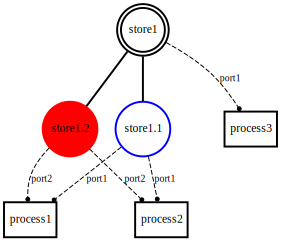

In [3]:
nested_composite_spec = {
    'store1': {
        'store1.1': {
            '_value': 1.1, 
            '_type': 'float',
        },
        'store1.2': {
            '_value': 2, 
            '_type': 'int',
        },
        'process1': {
            '_ports': {
                'port1': {'_type': 'type'}, 
                'port2': {'_type': 'type'},
            },
            'wires': {
                'port1': 'store1.1',
                'port2': 'store1.2',
            }
        },
        'process2': {
            '_ports': {
                'port1': {'_type': 'type'}, 
                'port2': {'_type': 'type'},
            },
            'wires': {
                'port1': 'store1.1',
                'port2': 'store1.2',
            }
        },
    },
    'process3': {
        'wires': {
            'port1': 'store1',
        }
    }
}
plot_settings['node_border_colors'] = {
    ('store1', 'store1.1'): 'blue'
}
plot_settings['node_fill_colors'] = {
    ('store1', 'store1.2'): 'red'
}
plot_bigraph(nested_composite_spec, **plot_settings)